# Mounting Drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

import os
os.chdir("drive/My Drive/Colab Notebooks/Data Science Corizo/Stock Price Pred")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Importing the Dataset

In [ ]:
df = pd.read_excel(r"1729258-1613615-Stock_Price_data_set_(1).xlsx",index_col="Date",parse_dates=True)
df = df.sort_values(by = "Date", ascending = True)
df.head(10)
# df.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700


In [ ]:
df.shape

(1009, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1009 entries, 2018-02-05 to 2022-02-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1009 non-null   float64
 1   High       1009 non-null   float64
 2   Low        1009 non-null   float64
 3   Close      1009 non-null   float64
 4   Adj Close  1009 non-null   float64
 5   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.2 KB


In [ ]:
df.count()

Open         1009
High         1009
Low          1009
Close        1009
Adj Close    1009
Volume       1009
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1009.0,4.190597e+02,1.085375e+02,2.339200e+02,3.314900e+02,3.777700e+02,5.091300e+02,6.923500e+02
High,1009.0,4.253207e+02,1.092630e+02,2.506500e+02,3.363000e+02,3.830100e+02,5.156300e+02,7.009900e+02
Low,1009.0,4.123740e+02,1.075559e+02,2.312300e+02,3.260000e+02,3.708800e+02,5.025300e+02,6.860900e+02
Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Adj Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Volume,1009.0,7.570685e+06,5.465535e+06,1.144000e+06,4.091900e+06,5.934500e+06,9.322400e+06,5.890430e+07


In [ ]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

# Checking for null values

In [ ]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Checking for Duplicate Values

In [ ]:
df.duplicated().sum()

0

# Plotting the variation of Target column

<Axes: xlabel='Date'>

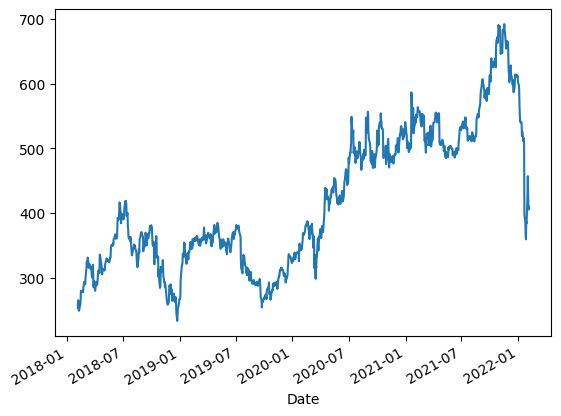

In [ ]:
df["Close"].plot()

Text(0.5, 1.0, 'Plot')

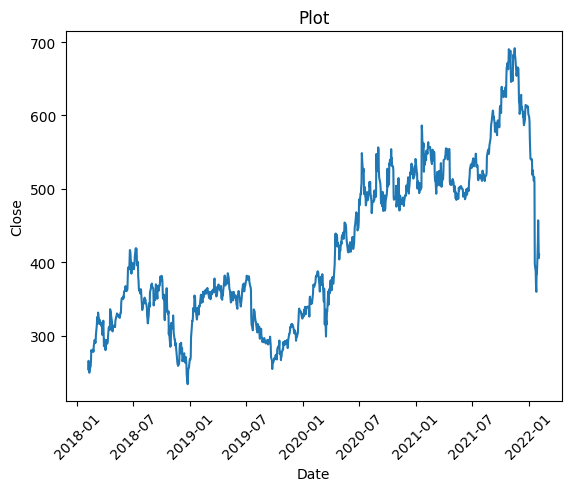

In [ ]:
plt.plot(df["Close"])
plt.xlabel("Date")
plt.ylabel("Close")
plt.xticks(rotation = 45)
plt.title("Plot")

#Exploratory Data Analysis

In [ ]:
#  All features are of float datatypes.

In [ ]:
df[df["Close"] == df["Adj Close"]].shape

(1009, 6)

In [ ]:
df.drop("Adj Close", axis = 1, inplace = True)

In [ ]:
df.head()

In [ ]:
### Clearly, we can say that Regression is not good for predicting stock price, since we can't say there is a positive corelation between "Close" with time. 
### So We are going to fit a lstm model.

# Preprocessing

In [ ]:
input_features = ["Open","High","Low","Volume"]
output_feature = ["Close"]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_input = scaler.fit_transform(df[input_features])
scaled_input = pd.DataFrame(columns = input_features, data = scaled_input, index = df.index)
scaled_input.head()



,Open,High,Low,Volume
Date,,,,
2018-02-05,0.061253,0.038304,0.041331,0.186150
2018-02-06,0.030059,0.035640,0.030273,0.198264
2018-02-07,0.071243,0.048408,0.072770,0.135690
2018-02-08,0.072334,0.037683,0.041265,0.141320
2018-02-09,0.043474,0.011436,0.010729,0.272902


In [ ]:
output = df["Close"]

In [ ]:
# This is the function which makes training Data with past 'n_steps' days as the input including the present day for predicting the current data "Close" value.

def splitingData(scaled_input, output, n_steps):
  X, y = [],[]
  for i in range(n_steps-1,scaled_input.shape[0]):
    X.append(scaled_input.iloc[i-n_steps+1: i+1, : ])
    y.append(output.iloc[i])
  return np.array(X), np.array(y)


In [ ]:
print(X.shape, y.shape)

(1002, 8, 4) (1002,)


In [ ]:
X, y = splitingData(scaled_input, output, 2)
index = int(X.shape[0]*0.8)
X_train , X_test = X[:index], X[index:]
y_train, y_test = y[: index], y[index:]

In [ ]:
print(X_train.shape, X_test.shape)

(806, 2, 4) (202, 2, 4)


# Building the model later training and then predicting

In [ ]:
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model = Sequential()
model.add(LSTM(32,input_shape=(X.shape[1],X.shape[2]), activation = "relu", return_sequences = False))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")

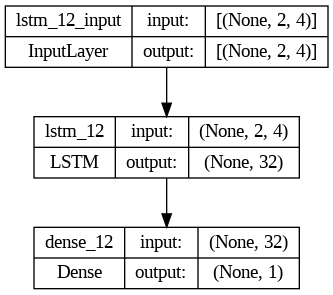

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True, show_layer_names = True)

In [ ]:
lstmModel = model.fit(X_train, y_train,epochs = 100, batch_size = 4, verbose = 1,shuffle = False)

Epoch 1/100
202/202 [==============================] - 2s 3ms/step - loss: 149916.7344
Epoch 2/100
202/202 [==============================] - 1s 3ms/step - loss: 92571.6797
Epoch 3/100
202/202 [==============================] - 1s 3ms/step - loss: 11458.3457
Epoch 4/100
202/202 [==============================] - 1s 4ms/step - loss: 2383.1345
Epoch 5/100
202/202 [==============================] - 1s 3ms/step - loss: 2001.3986
Epoch 6/100
202/202 [==============================] - 1s 3ms/step - loss: 1662.6825
Epoch 7/100
202/202 [==============================] - 1s 3ms/step - loss: 1389.7986
Epoch 8/100
202/202 [==============================] - 1s 3ms/step - loss: 1168.9253
Epoch 9/100
202/202 [==============================] - 1s 3ms/step - loss: 988.1812
Epoch 10/100
202/202 [==============================] - 1s 5ms/step - loss: 845.2504
Epoch 11/100
202/202 [==============================] - 1s 6ms/step - loss: 731.5358
Epoch 12/100
202/202 [==============================] - 2s 8ms

In [ ]:
predict = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


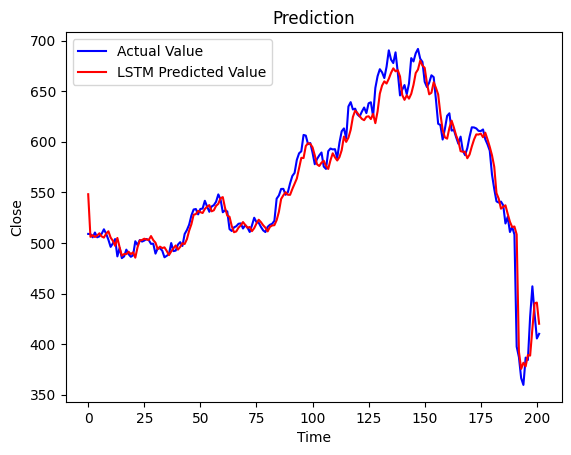

In [ ]:
plt.plot(y_test, color = "blue", label = "Actual Value")
plt.plot(predict, color = "red", label = "LSTM Predicted Value")
plt.xlabel("Time")
plt.ylabel("Close")
plt.title("Prediction")
plt.legend()
plt.show()

# Perfomance Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

rmse = mean_squared_error(y_test, predict, squared = False)
mape = mean_absolute_percentage_error(y_test, predict)
print("RMSE : ", rmse)
print("MAPE : ",mape)

RMSE :  14.487390750729958
MAPE :  0.017145200696141272
